In [1]:
import pandas as pd
import random
import copy
def generate_data(data_len):
#     data_len = 100
    sexs = [] ;dk1=['man','woman']
    times=[]; dk2=['light','night']
    expers=[] ; dk3=[i for i in range(0,31)]
    drinks=[] ; dk4=['Y','N']
    envrs=[]; dk5=['quiet','noise']
    stats=[] ;dk6=['Safe','Dangerous']
    sizes=[]; dk7=['big','small','medium']
    incoms=[] ;dk8= [i for i in range(30,101)]
    use_phones=[] ; dk9=dk4
    ages=[] ; dk10=[i for i in range(18,70)]
    
    accidents=['N'] * data_len

    for idx in range(0,data_len):
        sexs.append(random.choice(dk1))
        times.append(random.choice(dk2))
        expers.append(random.choice(dk3))
        drinks.append(random.choice(dk4))
        envrs.append(random.choice(dk5))
        stats.append(random.choice(dk6))
        sizes.append(random.choice(dk7))
        incoms.append(random.choice(dk8))
        use_phones.append(random.choice(dk9))
        ages.append(random.choice(dk10))


    data_dict={'Sex':sexs,'Time':times,'Experience':expers,'Drink':drinks,'Enviorment':envrs,'Size':sizes,
               'Income':incoms,'Use-phone':use_phones,'Road-Statuus':stats,'Accidient':accidents,'Age':ages}
    df = pd.DataFrame(data_dict)
    
    df.loc[((df['Drink']=='Y') & (df['Enviorment']=='noise'))|
           ((df['Road-Statuus']=='Dangerous') & (df['Use-phone']=='Y')), 'Accidient'] = 'Y' 
    
    return df

df = generate_data(1000)
df[0:10]


,Accidient,Age,Drink,Enviorment,Experience,Income,Road-Statuus,Sex,Size,Time,Use-phone
0,Y,48,N,quiet,8,98,Dangerous,man,small,night,Y
1,N,52,N,noise,12,100,Safe,man,small,night,Y
2,Y,49,N,quiet,0,62,Dangerous,man,small,night,Y
3,N,33,N,noise,17,35,Safe,man,big,light,Y
4,N,26,N,noise,20,68,Safe,woman,big,light,Y
5,Y,43,Y,noise,28,88,Safe,man,medium,night,N
6,N,18,N,noise,24,90,Safe,woman,big,night,Y
7,Y,40,Y,noise,19,34,Dangerous,woman,medium,night,Y
8,Y,44,N,quiet,30,84,Dangerous,man,medium,night,Y
9,Y,62,Y,noise,28,44,Safe,woman,big,night,N


In [2]:
# data mapping to number
train_df = copy.deepcopy(df)
train_df['Drink'] = train_df['Drink'].astype("category").cat.codes  
train_df['Enviorment'] = train_df['Enviorment'].astype("category").cat.codes  
train_df['Road-Statuus'] = train_df['Road-Statuus'].astype("category").cat.codes
train_df['Sex'] = train_df['Sex'].astype("category").cat.codes
train_df['Size'] = train_df['Size'].astype("category").cat.codes
train_df['Time'] = train_df['Time'].astype("category").cat.codes
train_df['Use-phone'] = train_df['Use-phone'].astype("category").cat.codes
train_df['Accidient'] = train_df['Accidient'].astype("category").cat.codes
train_df[0:10]

,Accidient,Age,Drink,Enviorment,Experience,Income,Road-Statuus,Sex,Size,Time,Use-phone
0,1,48,0,1,8,98,0,0,2,1,1
1,0,52,0,0,12,100,1,0,2,1,1
2,1,49,0,1,0,62,0,0,2,1,1
3,0,33,0,0,17,35,1,0,0,0,1
4,0,26,0,0,20,68,1,1,0,0,1
5,1,43,1,0,28,88,1,0,1,1,0
6,0,18,0,0,24,90,1,1,0,1,1
7,1,40,1,0,19,34,0,1,1,1,1
8,1,44,0,1,30,84,0,0,1,1,1
9,1,62,1,0,28,44,1,1,0,1,0


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datasets = train_df
X = datasets.iloc[:, list(np.arange(1,11))].values  # Feature 
Y = datasets.iloc[:, 0].values # Label

In [65]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [66]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# StandardScaler : 計算在一個訓練集上的平均值和標準差（standard deviation）
sc_X = StandardScaler() 
# fit_transform : 將feature歸一化到給定的最大、最小值範圍內，比如：[0,1]之間
X_Train = sc_X.fit_transform(X_Train) 
X_Test = sc_X.transform(X_Test)

print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=4, max_leaf_nodes=5, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


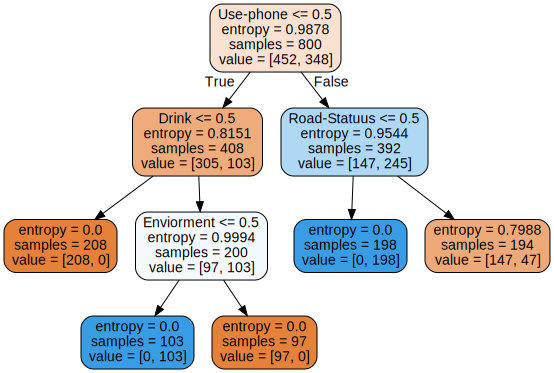

In [92]:
# Fitting the classifier into the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier(criterion='entropy',                                     
                                    min_samples_split=4,
                                    max_leaf_nodes=5, max_features=4)
classifier.fit(X_Train,Y_Train)
print(classifier)
import pydotplus
import collections
from graphviz import Source
from IPython.display import SVG

dot_data =tree.export_graphviz(classifier,
                       out_file=None,
                       feature_names=list(df.columns)[1:],                           
                       filled=True,
                       rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')


graph = Source(dot_data)
mySvg = SVG(graph.pipe(format='svg'))
mySvg

In [93]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
print('Test Accuracy is : {}'.format(np.trace(cm)/np.sum(cm)))

# Making the Confusion Matrix 
Confusion_Matrix = pd.crosstab(Y_Test,Y_Pred,rownames=['label'],colnames=['predict'])
Confusion_Matrix

Test Accuracy is : 0.93


predict,0,1
label,,
0,114,0
1,14,72


In [94]:
# Predicting the test set results
Y_Pred = classifier.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Y_Pred)
print('Total Accuracy is : {}'.format(np.trace(cm)/np.sum(cm)))

# Making the Confusion Matrix 
Confusion_Matrix = pd.crosstab(Y,Y_Pred,rownames=['label'],colnames=['predict'])
Confusion_Matrix

Total Accuracy is : 0.939


predict,0,1
label,,
0,566,0
1,61,373


In [95]:
mapdict = {1:'Y',0:'N'}
df['Accidient(p)'] = [mapdict[p] for p in Y_Pred]
df[:10]

,Accidient,Age,Drink,Enviorment,Experience,Income,Road-Statuus,Sex,Size,Time,Use-phone,Accidient(p)
0,Y,48,N,quiet,8,98,Dangerous,man,small,night,Y,Y
1,N,52,N,noise,12,100,Safe,man,small,night,Y,N
2,Y,49,N,quiet,0,62,Dangerous,man,small,night,Y,Y
3,N,33,N,noise,17,35,Safe,man,big,light,Y,N
4,N,26,N,noise,20,68,Safe,woman,big,light,Y,N
5,Y,43,Y,noise,28,88,Safe,man,medium,night,N,Y
6,N,18,N,noise,24,90,Safe,woman,big,night,Y,N
7,Y,40,Y,noise,19,34,Dangerous,woman,medium,night,Y,Y
8,Y,44,N,quiet,30,84,Dangerous,man,medium,night,Y,Y
9,Y,62,Y,noise,28,44,Safe,woman,big,night,N,Y


In [98]:
fail_df = df[df["Accidient"]!=df["Accidient(p)"]]
fail_df[:10]

,Accidient,Age,Drink,Enviorment,Experience,Income,Road-Statuus,Sex,Size,Time,Use-phone,Accidient(p)
63,Y,21,Y,noise,7,31,Safe,woman,big,light,Y,N
65,Y,66,Y,noise,21,57,Safe,man,small,night,Y,N
69,Y,67,Y,noise,16,57,Safe,man,big,night,Y,N
82,Y,66,Y,noise,2,66,Safe,man,big,night,Y,N
112,Y,21,Y,noise,15,47,Safe,woman,small,light,Y,N
127,Y,51,Y,noise,12,91,Safe,man,medium,night,Y,N
129,Y,56,Y,noise,13,42,Safe,woman,big,night,Y,N
132,Y,35,Y,noise,10,55,Safe,man,small,night,Y,N
181,Y,31,Y,noise,0,55,Safe,woman,medium,light,Y,N
197,Y,40,Y,noise,7,99,Safe,man,small,night,Y,N
